<a href="https://colab.research.google.com/github/vinayakgautam368/Memes-vs-Notes/blob/master/mems_vs_notes_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from tqdm import tqdm
import  cv2
from numpy import save
import matplotlib.pyplot as plt


In [ ]:

 

directory="drive/My Drive/memesnotes/Stage_2"
CATEGORIES=["Memes","Notes"]
data=[]
size=64
for category in CATEGORIES:
  path=os.path.join(directory,category)
  
  label=CATEGORIES.index(category)

  
  for img in os.listdir(path):
    
    try:
      img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
     
      img_arr=cv2.resize(img_arr,(size,size))
      data.append([img_arr,np.eye(2)[label]])
    except Exception as e:
      pass




    


1600


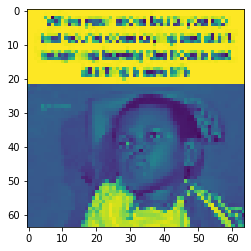

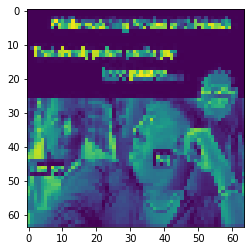

In [ ]:

np.random.shuffle(data)

print(len(data))
plt.imshow(data[0][0])
plt.show()
plt.imshow(data[20][0])
plt.show()


In [ ]:



import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5) 
        self.conv3 = nn.Conv2d(64, 128, 5)


        self.fc1=nn.Linear(4*4*128,512)   # image size  64 --> 60  --> 30 --> 26 --> 13 --> 9  --> 4  (height and width)
                                          # channels         1 --> 32 --> 64 --> 128 

        self.fc2=nn.Linear(512,2)

    def forward(self, x):
        # x = self.convs(x)
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv3(x)),(2,2))
        x = x.view(-1, 4*4*128)  
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        return F.softmax(x, dim=1)


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.0001)
loss_function = nn.BCELoss()

In [ ]:
X = torch.Tensor([i[0] for i in data]).view(-1,64,64) #here we get images array because we have big list of list in which each list contains
                                                      #first list as image array and second list as label for tha image
                                                      #[[image1,[label 1]],[image2,[label 2]]..................]
X = X/255.0               # here we normalize data
y = torch.Tensor([i[1] for i in data])

In [ ]:
# test_size = 0.1 
# size = int(len(X)*test_size)
# print(size)
print(y.shape)
print(X.shape)

torch.Size([1600, 2])
torch.Size([1600, 64, 64])


In [ ]:
# train_X = X[:-size]   
# train_y = y[:-size]



# test_X = X[-size:]
# test_y = y[-size:]
# print(len(train_X), len(test_X))
train_X=X[0:1300]
train_y=y[0:1300]

valid_X=X[1300:1450].view(-1,1,64,64)
valid_y=y[1300:1450]

test_X=X[1450:1600]
test_y=y[1450:1600]
print(len(train_X),len(test_X))
print(valid_X.shape)
print(train_X.shape)
print(train_y.shape)

1300 150
torch.Size([150, 1, 64, 64])
torch.Size([1300, 64, 64])
torch.Size([1300, 2])


  9%|▉         | 1/11 [00:01<00:19,  1.96s/it]

  Epoch: 1.      Loss: 0.691116213798523          Valid_loss: 0.6941246390342712


 18%|█▊        | 2/11 [00:03<00:16,  1.87s/it]

  Epoch: 1.      Loss: 0.6920956969261169          Valid_loss: 0.6912986040115356


 27%|██▋       | 3/11 [00:05<00:14,  1.81s/it]

  Epoch: 1.      Loss: 0.6925411224365234          Valid_loss: 0.6869939565658569


 36%|███▋      | 4/11 [00:06<00:12,  1.77s/it]

  Epoch: 1.      Loss: 0.6813272833824158          Valid_loss: 0.6816538572311401


 45%|████▌     | 5/11 [00:08<00:10,  1.74s/it]

  Epoch: 1.      Loss: 0.6733748912811279          Valid_loss: 0.6760605573654175


 55%|█████▍    | 6/11 [00:10<00:08,  1.73s/it]

  Epoch: 1.      Loss: 0.6652761101722717          Valid_loss: 0.6696208119392395


 64%|██████▎   | 7/11 [00:12<00:06,  1.71s/it]

  Epoch: 1.      Loss: 0.6710518598556519          Valid_loss: 0.665898859500885


 73%|███████▎  | 8/11 [00:13<00:05,  1.70s/it]

  Epoch: 1.      Loss: 0.6516525745391846          Valid_loss: 0.6573328375816345


 82%|████████▏ | 9/11 [00:15<00:03,  1.70s/it]

  Epoch: 1.      Loss: 0.6467018127441406          Valid_loss: 0.6471015810966492


 91%|█████████ | 10/11 [00:17<00:01,  1.69s/it]

  Epoch: 1.      Loss: 0.6353240013122559          Valid_loss: 0.6346323490142822


  0%|          | 0/11 [00:00<?, ?it/s]

  Epoch: 1.      Loss: 0.6249944567680359          Valid_loss: 0.6209073662757874


  9%|▉         | 1/11 [00:01<00:17,  1.78s/it]

  Epoch: 2.      Loss: 0.597362220287323          Valid_loss: 0.6055181622505188


 18%|█▊        | 2/11 [00:03<00:15,  1.76s/it]

  Epoch: 2.      Loss: 0.591513454914093          Valid_loss: 0.5900852680206299


 27%|██▋       | 3/11 [00:05<00:13,  1.74s/it]

  Epoch: 2.      Loss: 0.5747054815292358          Valid_loss: 0.5733137726783752


 36%|███▋      | 4/11 [00:06<00:12,  1.72s/it]

  Epoch: 2.      Loss: 0.5452632904052734          Valid_loss: 0.5495182275772095


 45%|████▌     | 5/11 [00:08<00:10,  1.70s/it]

  Epoch: 2.      Loss: 0.5127668380737305          Valid_loss: 0.5255253314971924


 55%|█████▍    | 6/11 [00:10<00:08,  1.69s/it]

  Epoch: 2.      Loss: 0.4975670576095581          Valid_loss: 0.49856963753700256


 64%|██████▎   | 7/11 [00:11<00:06,  1.69s/it]

  Epoch: 2.      Loss: 0.47873640060424805          Valid_loss: 0.4784814417362213


 73%|███████▎  | 8/11 [00:13<00:05,  1.69s/it]

  Epoch: 2.      Loss: 0.4323551654815674          Valid_loss: 0.4485851526260376


 82%|████████▏ | 9/11 [00:15<00:03,  1.69s/it]

  Epoch: 2.      Loss: 0.40301358699798584          Valid_loss: 0.4159599840641022


 91%|█████████ | 10/11 [00:16<00:01,  1.69s/it]

  Epoch: 2.      Loss: 0.39077112078666687          Valid_loss: 0.39045706391334534


  0%|          | 0/11 [00:00<?, ?it/s]

  Epoch: 2.      Loss: 0.36693477630615234          Valid_loss: 0.3606455326080322


  9%|▉         | 1/11 [00:01<00:17,  1.79s/it]

  Epoch: 3.      Loss: 0.30407780408859253          Valid_loss: 0.3287133276462555


 18%|█▊        | 2/11 [00:03<00:15,  1.76s/it]

  Epoch: 3.      Loss: 0.3155441880226135          Valid_loss: 0.3297869563102722


 27%|██▋       | 3/11 [00:05<00:13,  1.73s/it]

  Epoch: 3.      Loss: 0.28940582275390625          Valid_loss: 0.29494112730026245


 36%|███▋      | 4/11 [00:06<00:12,  1.72s/it]

  Epoch: 3.      Loss: 0.24958063662052155          Valid_loss: 0.2530760169029236


 45%|████▌     | 5/11 [00:08<00:10,  1.70s/it]

  Epoch: 3.      Loss: 0.22279898822307587          Valid_loss: 0.24872146546840668


 55%|█████▍    | 6/11 [00:10<00:08,  1.70s/it]

  Epoch: 3.      Loss: 0.21413585543632507          Valid_loss: 0.22804871201515198


 64%|██████▎   | 7/11 [00:11<00:06,  1.69s/it]

  Epoch: 3.      Loss: 0.19128873944282532          Valid_loss: 0.19672442972660065


 73%|███████▎  | 8/11 [00:13<00:05,  1.68s/it]

  Epoch: 3.      Loss: 0.17439624667167664          Valid_loss: 0.20469212532043457


 82%|████████▏ | 9/11 [00:15<00:03,  1.68s/it]

  Epoch: 3.      Loss: 0.18007640540599823          Valid_loss: 0.2057775855064392


 91%|█████████ | 10/11 [00:16<00:01,  1.68s/it]

  Epoch: 3.      Loss: 0.14226408302783966          Valid_loss: 0.16126272082328796


  0%|          | 0/11 [00:00<?, ?it/s]

  Epoch: 3.      Loss: 0.15279757976531982          Valid_loss: 0.1526074856519699


  9%|▉         | 1/11 [00:01<00:18,  1.81s/it]

  Epoch: 4.      Loss: 0.14547690749168396          Valid_loss: 0.1472240537405014


 18%|█▊        | 2/11 [00:03<00:15,  1.77s/it]

  Epoch: 4.      Loss: 0.09772401303052902          Valid_loss: 0.13375690579414368


 27%|██▋       | 3/11 [00:05<00:13,  1.74s/it]

  Epoch: 4.      Loss: 0.12590977549552917          Valid_loss: 0.14773936569690704


 36%|███▋      | 4/11 [00:06<00:12,  1.72s/it]

  Epoch: 4.      Loss: 0.11327436566352844          Valid_loss: 0.13993804156780243


 45%|████▌     | 5/11 [00:08<00:10,  1.70s/it]

  Epoch: 4.      Loss: 0.08645915240049362          Valid_loss: 0.1284719705581665


 55%|█████▍    | 6/11 [00:10<00:08,  1.70s/it]

  Epoch: 4.      Loss: 0.05477121099829674          Valid_loss: 0.11850884556770325


 64%|██████▎   | 7/11 [00:11<00:06,  1.69s/it]

  Epoch: 4.      Loss: 0.10222013294696808          Valid_loss: 0.11420512944459915


 73%|███████▎  | 8/11 [00:13<00:05,  1.68s/it]

  Epoch: 4.      Loss: 0.08952897787094116          Valid_loss: 0.11323997378349304


 82%|████████▏ | 9/11 [00:15<00:03,  1.71s/it]

  Epoch: 4.      Loss: 0.06228088587522507          Valid_loss: 0.12229955941438675


 91%|█████████ | 10/11 [00:18<00:02,  2.28s/it]

  Epoch: 4.      Loss: 0.06605757772922516          Valid_loss: 0.12701968848705292


100%|██████████| 11/11 [00:19<00:00,  1.80s/it]

  Epoch: 4.      Loss: 0.07141165435314178          Valid_loss: 0.12893901765346527


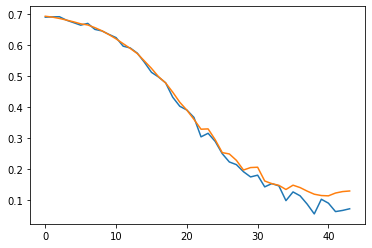

In [ ]:
batch_size = 128
EPOCHS = 4
lost=[]
valid_lost=[]
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), batch_size)):    # tqdm for seeing progress bar 
        # print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+batch_size].view(-1, 1, 64,64)
        
        batch_y = train_y[i:i+batch_size]

        net.zero_grad()

        outputs = net(batch_X)
        valid_output=net(valid_X)
        loss = loss_function(outputs, batch_y)
        valid_loss=loss_function(valid_output,valid_y)
        valid_lost.append(valid_loss)
        
        lost.append(loss)
        
        loss.backward()
        optimizer.step()    # update of parameters 
        print(f"  Epoch: {epoch+1}.      Loss: {loss}          Valid_loss: {valid_loss}")

plt.plot(lost) 
plt.plot(valid_lost)
plt.show()   

In [ ]:
correct = 0
total = 0
valid_corr=0
valid_total=0

train_corr=0
train_total=0


with torch.no_grad():
  for i in tqdm(range(len(train_X))):
    train_class=torch.argmax(train_y[i])           # torch.argamx use for hot encoding
    train_pred=net(train_X[i].view(-1,1,64,64))[0]    # this is the list of list so we give [0] to get inside list ex [ [ ] ]
    predss_class=torch.argmax(train_pred)

    if predss_class==train_class:
      train_corr+=1
    train_total+=1  

with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 64,64))[0]     # returns a list, 

        predicted_class = torch.argmax(net_out)                 

        if predicted_class == real_class:
            correct += 1
        total += 1

with torch.no_grad():
  for i in tqdm(range(len(valid_X))):
    orig_class=torch.argmax(valid_y[i])    #argmax gives the value of index at which value is maximum in the tensor
    y_pred=net(valid_X[i].view(-1,1,64,64))[0]
    preds_class=torch.argmax(y_pred)

    if preds_class==orig_class:   #here we check the predicted label and actual label is same or not
      valid_corr+=1               
    valid_total+=1  






print("\n")
print(" Train Accuracy ",round(train_corr/train_total,5)*100,"%")
print(" Test Accuracy: ", round(correct/total, 5)*100,"%")         # round is  used  to rounding of the numbers
print(" Valid Accuracy ",round(valid_corr/valid_total,5)*100,"%")

100%|██████████| 150/150 [00:00<00:00, 212.66it/s]



 Train Accuracy  98.615 %
 Test Accuracy:  98.667 %
 Valid Accuracy  97.333 %


# ** Checking by giving new image**




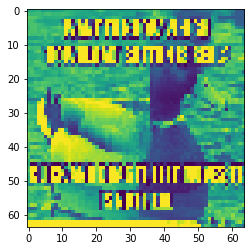

In [ ]:
m="drive/My Drive/check.jpg"
img=cv2.imread(m,cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img,(64,64))
plt.imshow(img)
plt.show()

In [ ]:
x=torch.tensor(img).view(-1,1,64,64)
print(x.shape)
x=x/255.0

torch.Size([1, 1, 64, 64])


In [ ]:
m=net(x.view(-1,1,64,64))
print(m[0].shape)
b=torch.argmax(m)
if b==0:
  print("This is MEME")
elif b==1:
  print("This is NOTE")  

torch.Size([2])
This is MEME
